# Churn Telecom Project
**Authors:** Elena Burlando

## Overview

The objective of this project is to analize Telecom Customer data in order to gain insights on what is contributing to customer churn. 

As an outcome of this analysis we are aiming to get: 
 * factors contributing to customer churn 
 * reccommendations on preventive measures to reduce customers leaving

## Business Problem

Telecom company is experiencing 14.5% churn of its customers. As it is costly to the company to lose every seventh of its clients and it is also costly to acquire new clients. It is important to identify why customers are leaving to come up with preventive measures. 

One of the main pain points for this project is the lack of industry/business knowledge.

### Data Understanding 

* [Telecom Churn data](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

The dataset has 21 columns (including the target column) and 3333 rows of data entries. 

**Predictors**: 
       'state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'
***
* The target variable is churn.  
* The main score is f1. 
* We intend to use Classifiers such as Decision Tree, Random Forest, and Logistic Regression to calculate formula to predict whether a customer will churn.  
* For hyper parameter tuning we will use GridSearchCV and RandomSearchCV. 
* We will be following CRISP-DM process for this project. 
***

### EDA

In [350]:
# import libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
import pickle
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, fbeta_score,\
classification_report, log_loss, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [266]:
#import data

df = pd.read_csv('churn_telecom.csv')
print(df.shape)
print(df.info())
df.head()

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [90]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [91]:
#describe categorical columns
df.describe(include = ['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,377-7177,no,no
freq,106,1,3010,2411


In [92]:
# checking if there are any duplicates in 'phone number' column and whether is should be treated as ID column. 
duplicates = df[df['phone number'].duplicated()]
len(duplicates)

0

In [93]:
df['phone number'].nunique()

3333

Each row belongs to a unique client (phone number). 

In [94]:
# Number of customers who churned
print(df.churn.value_counts())
print(df.churn.value_counts(normalize=True))

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


The dataset is imbalanced with 14.5% churned customers. Baseline score is 85.5% meaning that our final model's accuracy score should be higher than baseline score. 

In [95]:
# Visually inspecting examples of the customers who churned
df_churn = df[df.churn==True]
df_churn.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,...,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,...,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True


In [96]:
# Looking at 'state' & 'area code' predictors
df.groupby(['state']).agg({'phone number':'count', 'churn':'mean'}
                                  ).sort_values(by='churn', ascending=False).reset_index()

,state,phone number,churn
0,NJ,68,0.264706
1,CA,34,0.264706
2,TX,72,0.250000
3,MD,70,0.242857
4,SC,60,0.233333
5,MI,73,0.219178
6,MS,65,0.215385
7,NV,66,0.212121
8,WA,66,0.212121
9,ME,62,0.209677


In [97]:
df.groupby(['area code']).agg({'phone number':'count', 'churn':'mean'}
                                  ).sort_values(by='churn', ascending=False).reset_index()

,area code,phone number,churn
0,510,840,0.148810
1,408,838,0.145585
2,415,1655,0.142598


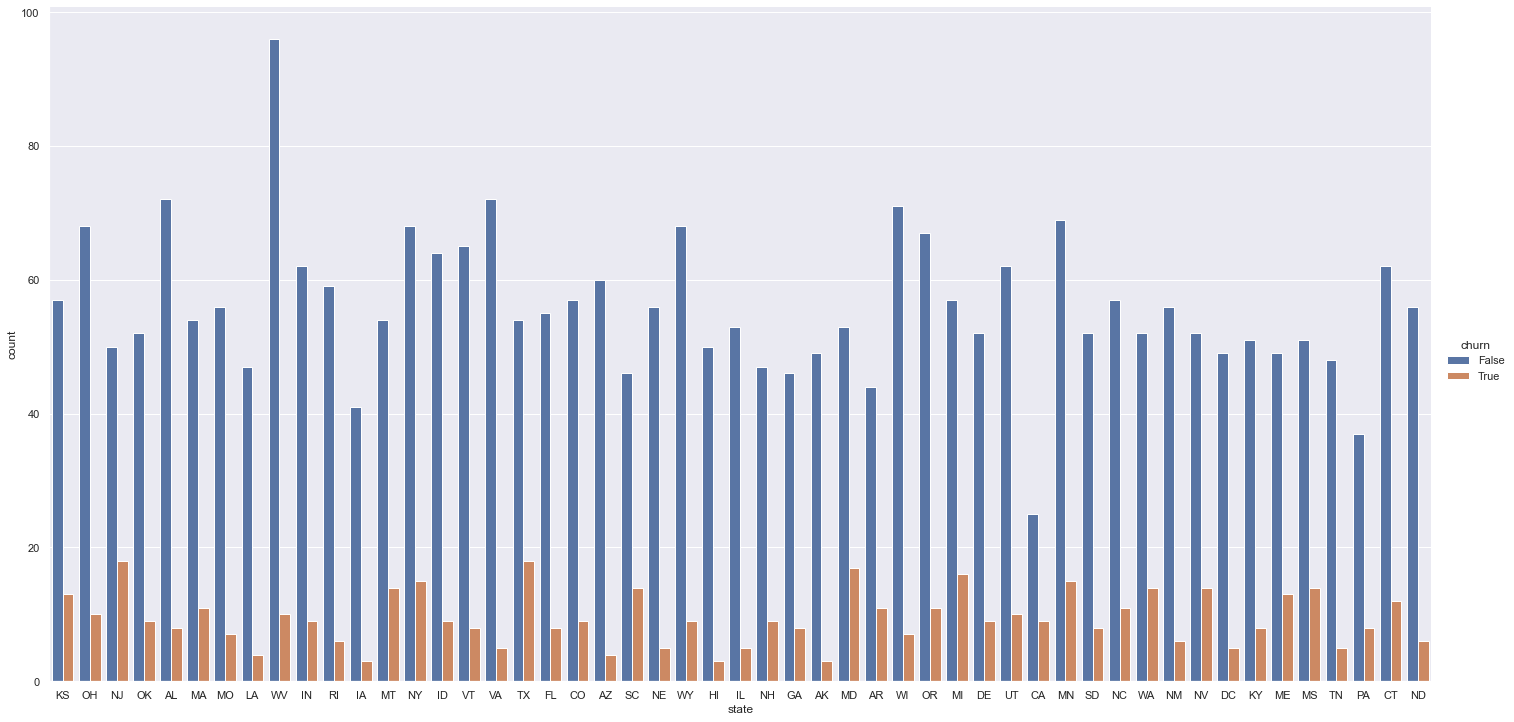

In [98]:
g = sns.catplot(x='state', kind="count", hue='churn', data=df, height=10, aspect=2)

We have three Bay Area, CA area codes listed under all 50 states and Washington DC. 

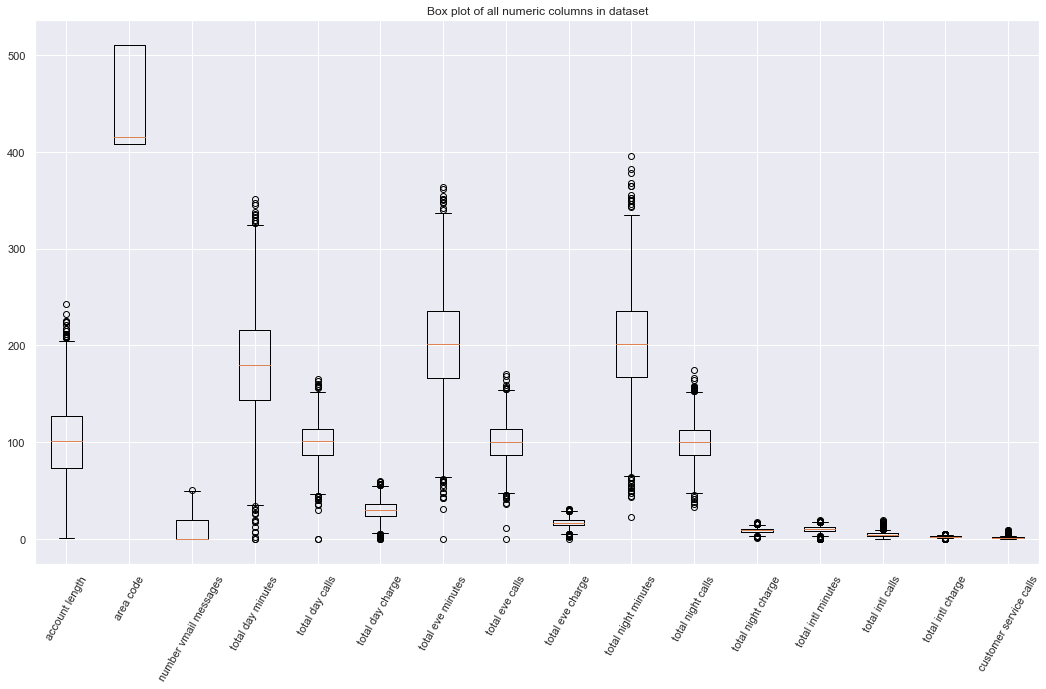

In [99]:
#Create a box plot of each numeric column to review feature distribution

plt.figure(figsize=(18,10))
plt.boxplot([df_num[col] for col in df_num.columns])
plt.title("Box plot of all numeric columns in dataset")
plt. margins(x=1)
plt.xticks(range(1, 17), df_num.columns.values, rotation=60)
plt.show();



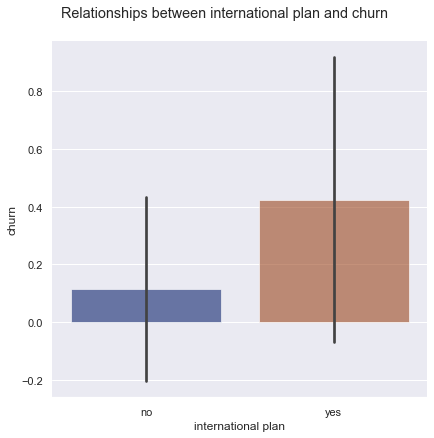

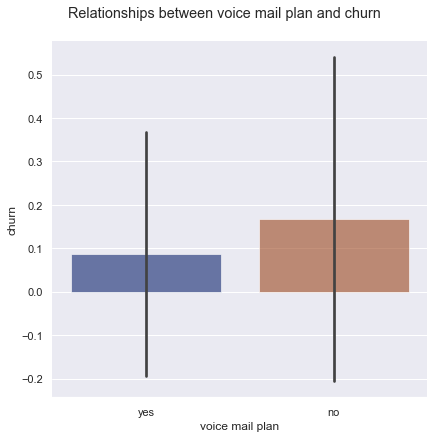

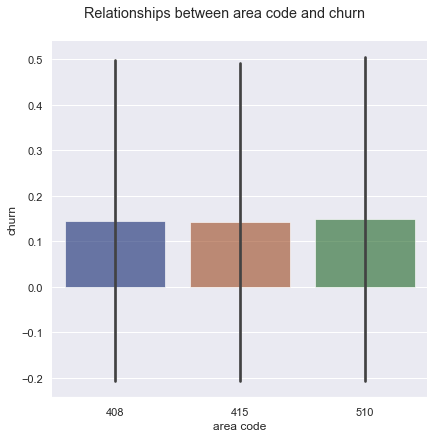

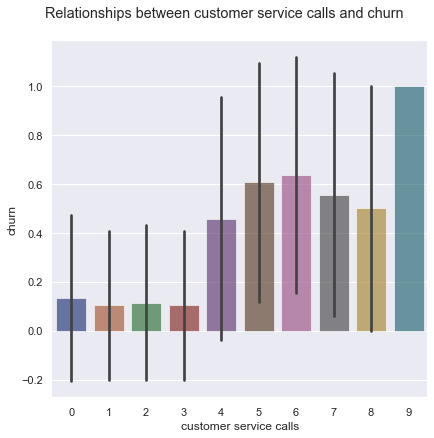

In [100]:
# Plotting relationships between 'international plan', 'voice mail plan', 'area code', 'customer service calls' 
# and churn. 

df_cat = df[['international plan', 'voice mail plan', 'area code', 'customer service calls']]

for col in df_cat.columns:
    g = sns.catplot(
    data=df, kind='bar',
    x=col, y='churn',
    ci="sd", palette='dark', alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');


- It appears that customers with international plan are almost 30% likely to churn compare to clients without international plan. 
- Customers without voice mail plan are about 10% more likely to churn compare to those with this type of plan. 
- There is no obvious difference in churn accross area codes.
- The numbner of customer service calls is significantly impacting churn. If a customer made more than 3 service calls, they are around 30%+ more likely to churn with a 100% of churn likelihood reached at 9 calls. 

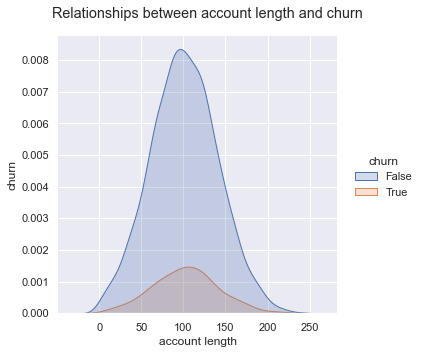

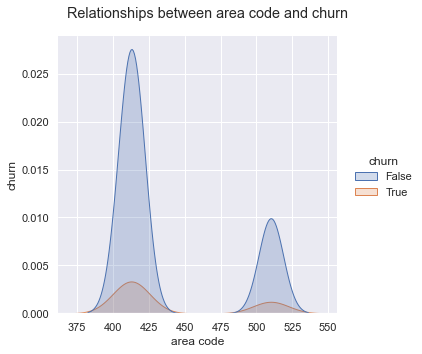

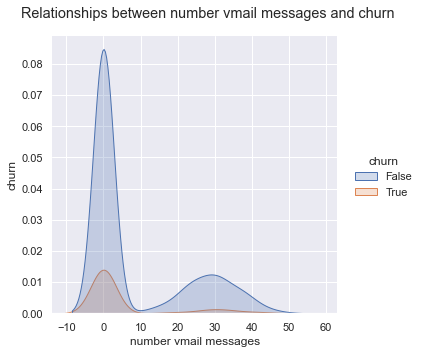

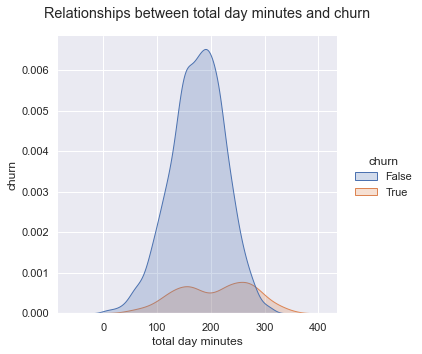

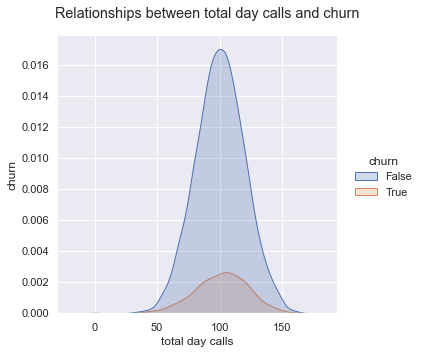

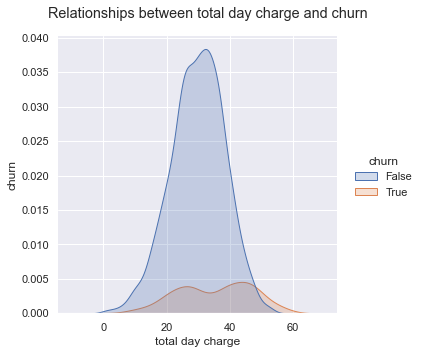

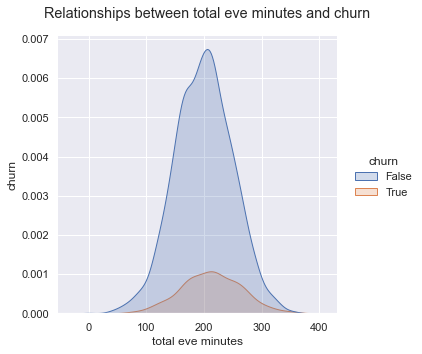

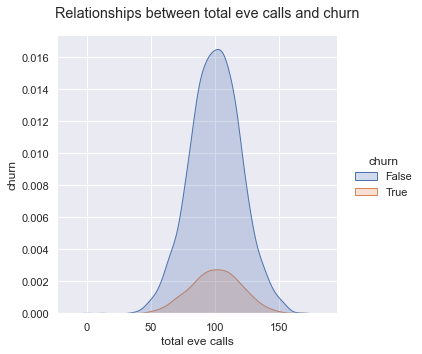

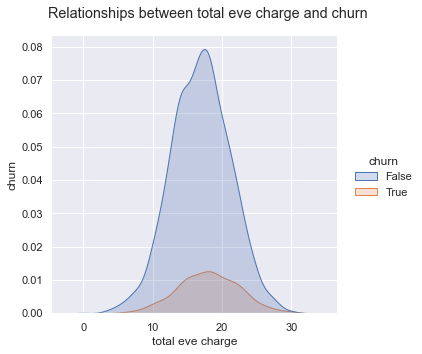

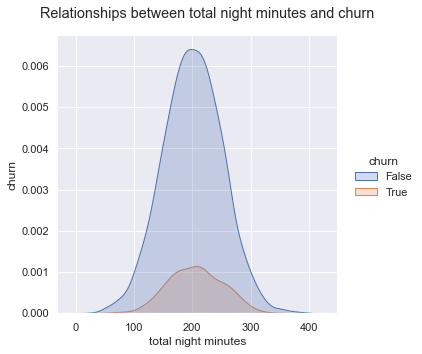

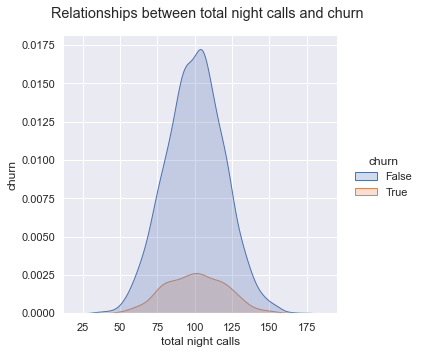

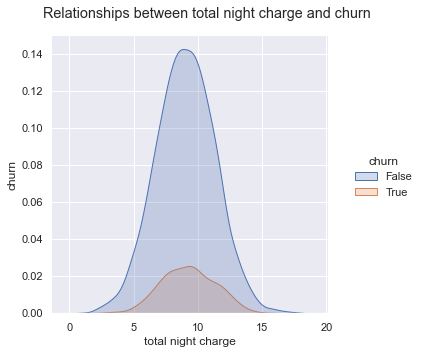

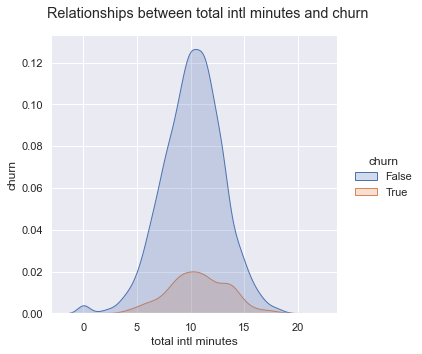

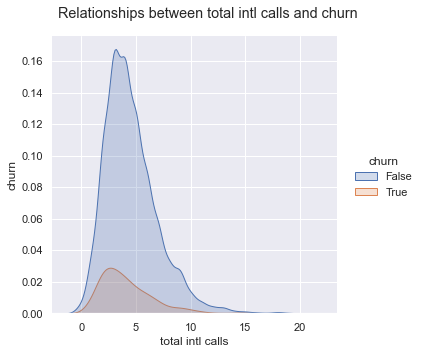

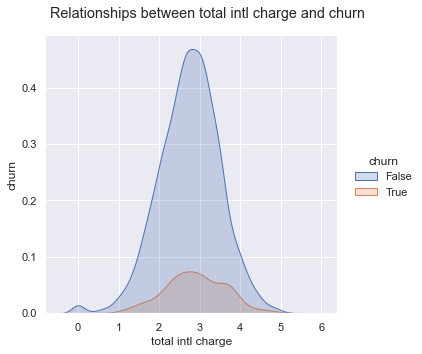

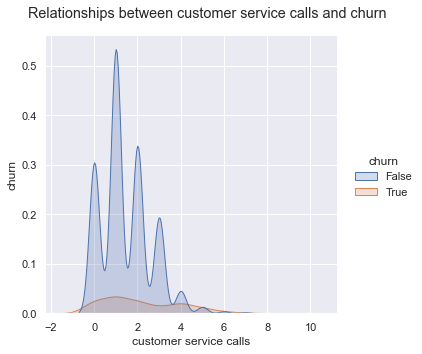

In [101]:
df_num = df.select_dtypes('number')

for col in df_num.columns:
    g = sns.displot(
    df, x=col, 
    hue='churn', kind="kde", 
    fill=True
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');

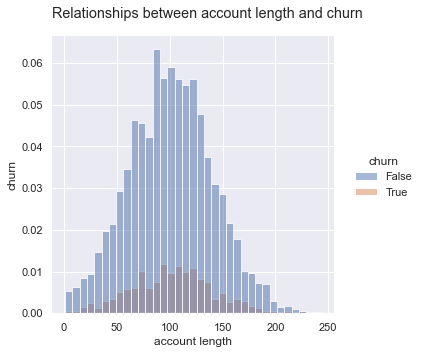

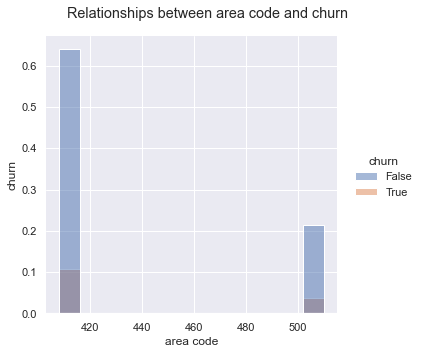

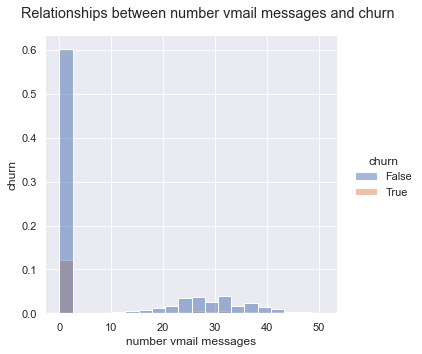

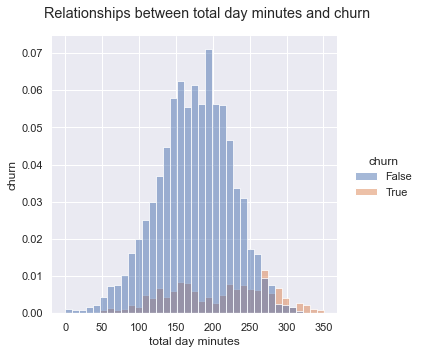

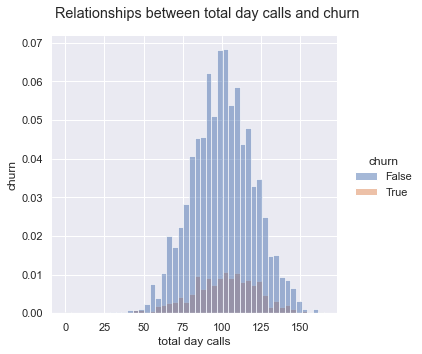

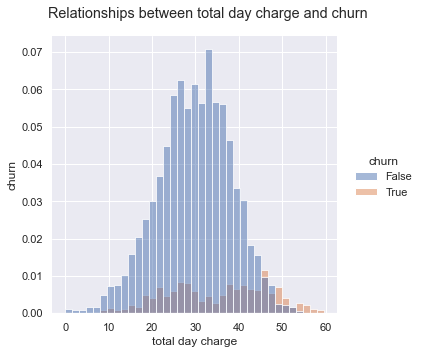

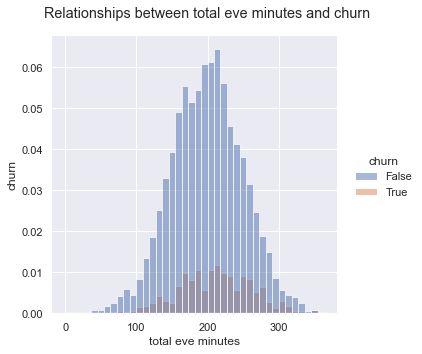

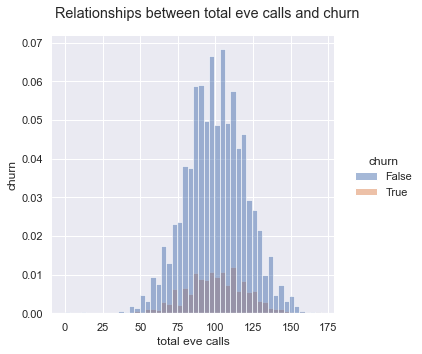

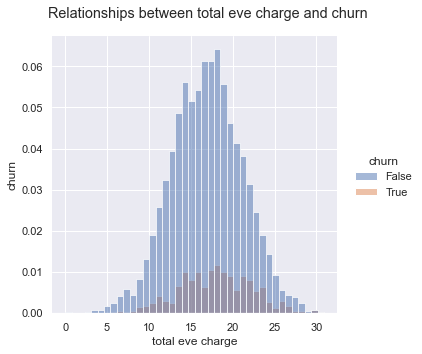

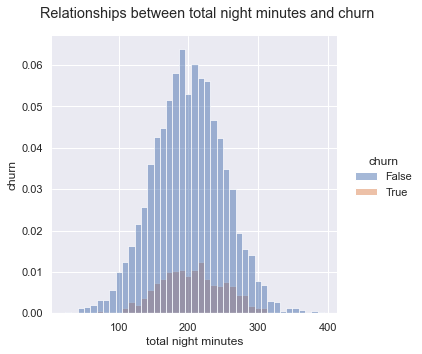

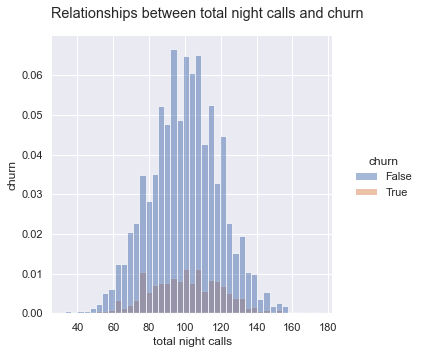

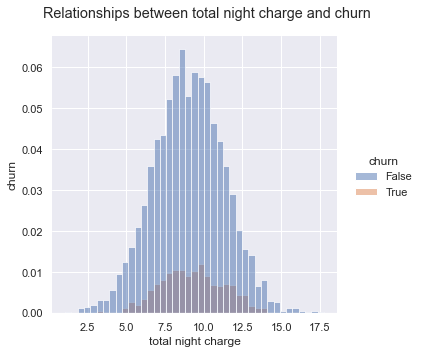

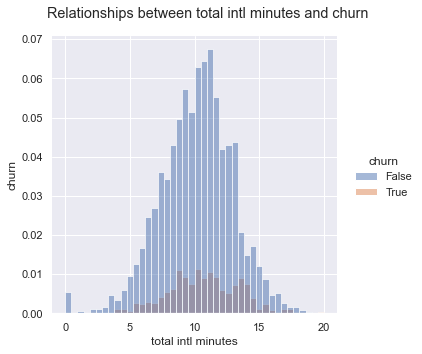

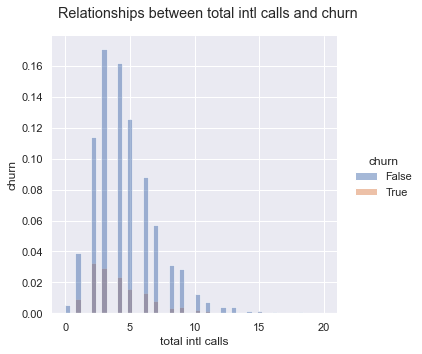

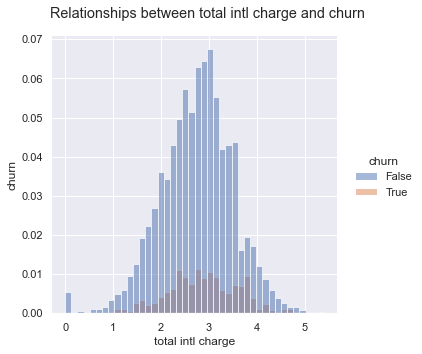

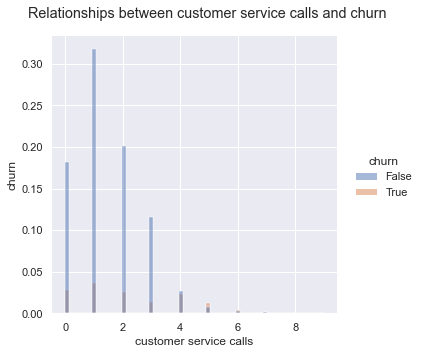

In [102]:
df_num = df.select_dtypes('number')

for col in df_num.columns:
    g = sns.displot(
    df, x=col, 
    hue='churn', stat='probability', 
    fill=True
    )
    g.despine(left=True)
    g.set_axis_labels(f'{col}', 'churn')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Relationships between {col} and churn');

If 'total day minutes' have reached 275, it is leading to churn so as the reach of $50 on 'total day charge'. 

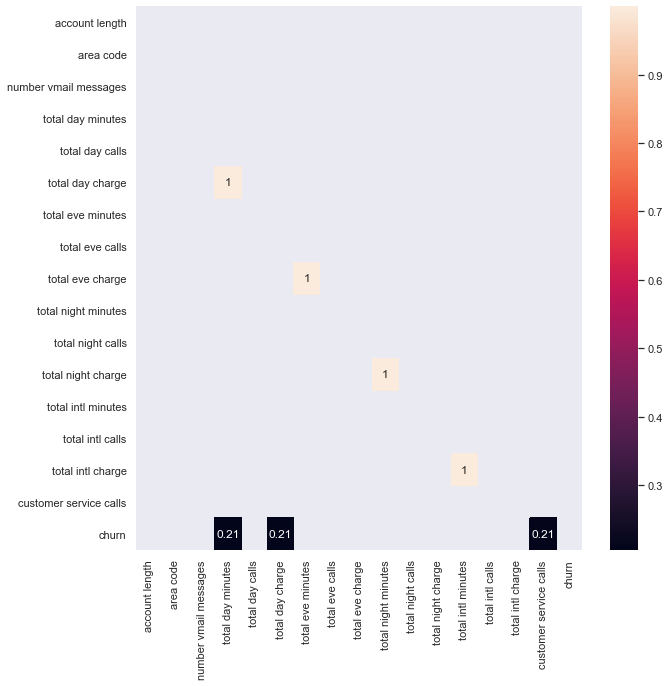

In [103]:
# Use the .heatmap method to illustrate the correlation. 
corr = df.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(corr, mask=trimask | (np.abs(corr) <= 0.15), annot=True);

In [104]:
df.corr()['churn'].map(abs).sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64

According to Pearson correlation, these three features are contributing most to the target: 
- customer service calls    
- total day minutes         
- total day charge    

---
**EDA findings:** 
- Customers with 'international plan' are almost 30% likely to churn compare to clients without international plan.
- Customers without 'voice mail plan' are about 10% more likely to churn compare to those with this type of plan.
- The numbner of 'customer service calls' is significantly impacting churn. If a customer made more than 3 service calls, they are around 30%+ more likely to churn with a 100% of churn likelihood reached at 9 calls. 
- If 'total day minutes' have reached 275, it is leading to churn. 
- The reach of $50 on 'total day charge' also leads to higher probability of churn. 
- 'customer service calls', 'total day minutes', 'total day charge' each have 0.2 corrrelation with 'churn'. 

- We have three Bay Area, CA area codes listed under all 50 states and Washington DC. Churn accross three area codes is equally distributed.
---

### PREPROCESSING

#### Train-test split

In [215]:
# assign features and target

X = df.drop(columns=['churn', 'phone number'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [216]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown = 'ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

### Decision Tree Baseline model

In [355]:
import os

In [356]:
os.listdir('models')

['baseline_model.pkl', '.ipynb_checkpoints']

In [ ]:
if 'baseline_model.pkl' in os.listdir('models'):

In [ ]:
if Path('models/baseline_model.pkl').exists(): 
    print("exists") 
else:
    print("does not exist") 

In [353]:
if baseline_model in Path('models/'):
    print('exists')
else: 
    print('does not exist')

TypeError: argument of type 'PosixPath' is not iterable

In [134]:
baseline_model = Pipeline(steps=[
    ('trans', trans),
    ('dt', DecisionTreeClassifier(max_depth=3, class_weight = 'balanced', 
                                 random_state=SEED))
])

In [135]:
baseline_model.fit(X_train, y_train)

pred_train = baseline_model.predict(X_train)
pred_test = baseline_model.predict(X_test)

# Train scores
print('Decision Tree baseline model train scores:')

print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')

print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))


# Test scores
print('Decision Tree baseline model test scores:')

print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')

print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Decision Tree baseline model train scores:
ROC AUC score train: 0.8252956437313979
Log_loss train: 4.146379525061388
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      2148
        True       0.55      0.75      0.64       351

    accuracy                           0.88      2499
   macro avg       0.76      0.83      0.78      2499
weighted avg       0.90      0.88      0.89      2499

[[1936  212]
 [  88  263]]
Decision Tree baseline model test scores:
AUC score test: 0.8322325822325822
Log_loss test: 4.389893366025452
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       702
        True       0.57      0.77      0.66       132

    accuracy                           0.87       834
   macro avg       0.76      0.83      0.79       834
weighted avg       0.89      0.87      0.88       834

[[626  76]
 [ 30 102]]


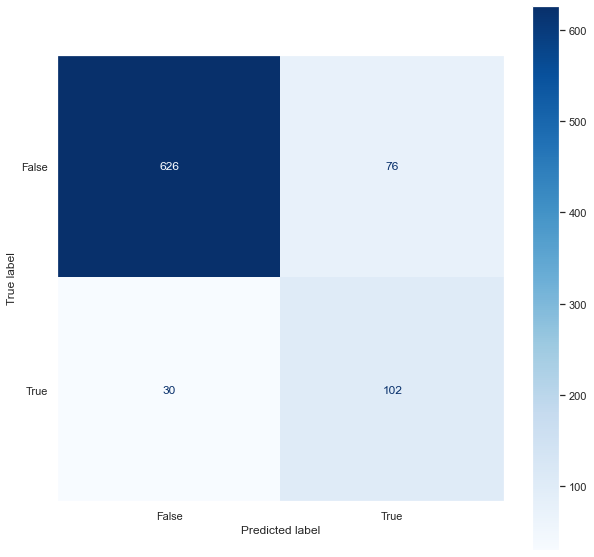

In [110]:
# Visualize your confusion matrix
plot_confusion_matrix(baseline_model, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [347]:
with open('models/baseline_model.pkl', 'wb') as f:
    joblib.dump(baseline_model, f)

### Model Tuning - Random Forest

#### rf_gs_model_1

In [164]:
rf_pipe = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(random_state=SEED))])

In [165]:
# Define the grid
grid = [{'RF__class_weight': ['balanced', 'balanced_subsample'], 
         'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [169]:
# Define a grid search
rf_gs_model_1 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_1.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                        

In [170]:
pred_train = rf_gs_model_1.predict(X_train)
pred_test = rf_gs_model_1.predict(X_test)

# Train scores
print('Random Forest model_1 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_1 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_1 train scores:


ROC AUC score train: 0.8888033392223336
Log_loss train: 2.639861639488203


              precision    recall  f1-score   support

       False       0.97      0.94      0.95      2148
        True       0.69      0.84      0.76       351

    accuracy                           0.92      2499
   macro avg       0.83      0.89      0.86      2499
weighted avg       0.93      0.92      0.93      2499

[[2013  135]
 [  56  295]]


Random Forest model_1 test scores:


AUC score test: 0.8736726236726238
Log_loss test: 3.7686875579789167


              precision    recall  f1-score   support

       False       0.97      0.90      0.93       702
        True       0.61      0.85      0.71       132

    accuracy                           0.89       834
   macro avg       0.79      0.87      0.82       834
weighted avg       0.91      0.89      0.90       834

[[631  71]
 [ 20 112]]


In [171]:
rf_gs_model_1.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                         

#### rf_gs_model_2

In [173]:
# Tuning Random Forest model by adjusting the hyperparameters

grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['gini', 'entropy'],
         'RF__max_depth': [5, 6, 10], 
         'RF__min_samples_split': [9, 10, 40], 
         'RF__min_samples_leaf': [10, 20, 30]}]

# Define a grid search
rf_gs_model_2 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_2.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                               

In [174]:
pred_train = rf_gs_model_2.predict(X_train)
pred_test = rf_gs_model_2.predict(X_test)

# Train scores
print('Random Forest model_2 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_2 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_2 train scores:


ROC AUC score train: 0.892145744799376
Log_loss train: 2.6536839583295917


              precision    recall  f1-score   support

       False       0.97      0.94      0.95      2148
        True       0.68      0.85      0.76       351

    accuracy                           0.92      2499
   macro avg       0.83      0.89      0.86      2499
weighted avg       0.93      0.92      0.93      2499

[[2009  139]
 [  53  298]]


Random Forest model_2 test scores:


AUC score test: 0.8926443926443927
Log_loss test: 3.0232310008239103


              precision    recall  f1-score   support

       False       0.97      0.92      0.95       702
        True       0.67      0.86      0.76       132

    accuracy                           0.91       834
   macro avg       0.82      0.89      0.85       834
weighted avg       0.93      0.91      0.92       834

[[647  55]
 [ 18 114]]


In [175]:
rf_gs_model_2.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...l charge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                

#### rf_gs_model_3

In [179]:
# Tuning Random Forest model by adjusting the hyperparameters

grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__n_estimators':[100, 500, 1000],
         'RF__criterion': ['gini', 'entropy'],  
         'RF__max_depth': [9, 10, 20], 
         'RF__min_samples_split': [7, 8, 9], 
         'RF__min_samples_leaf': [9, 10, 15]}]

# Define a grid search
rf_gs_model_3 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_3.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                         Index(['state', 'international plan', 'voice mail plan'], dtype='object'))])),
                                       ('RF',
                                        RandomForestClassifier(random_state=13))]),
             par

In [180]:
pred_train = rf_gs_model_3.predict(X_train)
pred_test = rf_gs_model_3.predict(X_test)

# Train scores
print('Random Forest model_3 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_3 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_3 train scores:


ROC AUC score train: 0.8947062662146461
Log_loss train: 2.5016490099839537


              precision    recall  f1-score   support

       False       0.97      0.94      0.96      2148
        True       0.70      0.85      0.77       351

    accuracy                           0.93      2499
   macro avg       0.84      0.89      0.86      2499
weighted avg       0.94      0.93      0.93      2499

[[2020  128]
 [  53  298]]


Random Forest model_3 test scores:


AUC score test: 0.8921587671587671
Log_loss test: 3.2303037580890592


              precision    recall  f1-score   support

       False       0.97      0.91      0.94       702
        True       0.65      0.87      0.75       132

    accuracy                           0.91       834
   macro avg       0.81      0.89      0.84       834
weighted avg       0.92      0.91      0.91       834

[[641  61]
 [ 17 115]]


In [155]:
rf_gs_model_3.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                         

#### rf_gs_model_4

In [181]:
# Tuning Random Forest model by adjusting the hyperparameters

grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['entropy'],
         'RF__max_features': ['auto', 'sqrt', 'log2', 0.2, 0.4],   
         'RF__min_samples_split': [5, 9], 
         'RF__min_samples_leaf': [10, 12, 13]}]

# Define a grid search
rf_gs_model_4 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_4.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                                                        sparse=False))]),
                                                                         Index(['state', 'international plan', 'voice mail plan'], dtype='object'))])),
                        

In [182]:
pred_train = rf_gs_model_4.predict(X_train)
pred_test = rf_gs_model_4.predict(X_test)

# Train scores
print('Random Forest model_4 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_4 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_4 train scores:


ROC AUC score train: 0.9095759919782268
Log_loss train: 1.5479749231216284


              precision    recall  f1-score   support

       False       0.97      0.97      0.97      2148
        True       0.84      0.85      0.84       351

    accuracy                           0.96      2499
   macro avg       0.91      0.91      0.91      2499
weighted avg       0.96      0.96      0.96      2499

[[2090   58]
 [  54  297]]


Random Forest model_4 test scores:


AUC score test: 0.904072779072779
Log_loss test: 1.8222116931858097


              precision    recall  f1-score   support

       False       0.97      0.97      0.97       702
        True       0.83      0.84      0.83       132

    accuracy                           0.95       834
   macro avg       0.90      0.90      0.90       834
weighted avg       0.95      0.95      0.95       834

[[679  23]
 [ 21 111]]


In [183]:
rf_gs_model_4.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

#### rf_gs_model_5

In [184]:
# Tuning Random Forest model by adjusting the hyperparameters

grid = [{'RF__class_weight': ['balanced_subsample'],
         'RF__criterion': ['entropy'],
         'RF__max_features': [0.3, 0.4, 0.5, 0.8],   
         'RF__min_samples_split': [5, 6, 7, 8, 9], 
         'RF__min_samples_leaf': [5, 6, 7, 8, 9, 10]}]

# Define a grid search
rf_gs_model_5 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_5.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                               

In [185]:
pred_train = rf_gs_model_5.predict(X_train)
pred_test = rf_gs_model_5.predict(X_test)

# Train scores
print('Random Forest model_5 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_5 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_5 train scores:


ROC AUC score train: 0.9478982635407216
Log_loss train: 0.8292712974880706


              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.92      0.91      0.91       351

    accuracy                           0.98      2499
   macro avg       0.95      0.95      0.95      2499
weighted avg       0.98      0.98      0.98      2499

[[2120   28]
 [  32  319]]


Random Forest model_5 test scores:


AUC score test: 0.9057562807562807
Log_loss test: 1.3666518189524643


              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.92      0.83      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834

[[692  10]
 [ 23 109]]


In [186]:
rf_gs_model_5.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

#### rf_gs_model_6

In [187]:
# Tuning Random Forest model by adjusting the hyperparameters

grid = [{'RF__class_weight': ['balanced_subsample'], 
         'RF__criterion': ['entropy'],
         'RF__max_features': [0.4],   
         'RF__min_samples_split': [2, 3, 4, 5], 
         'RF__min_samples_leaf': [2, 3, 4, 5, 6]}]

# Define a grid search
rf_gs_model_6 = GridSearchCV(rf_pipe, grid, scoring='f1', cv=5)

# Fit the training data
rf_gs_model_6.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night cha...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                               

In [188]:
pred_train = rf_gs_model_6.predict(X_train)
pred_test = rf_gs_model_6.predict(X_test)

# Train scores
print('Random Forest model_6 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_6 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_6 train scores:


ROC AUC score train: 0.9772636839675944
Log_loss train: 0.35935085291590335


              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.97      0.96      0.96       351

    accuracy                           0.99      2499
   macro avg       0.98      0.98      0.98      2499
weighted avg       0.99      0.99      0.99      2499

[[2136   12]
 [  14  337]]


Random Forest model_6 test scores:


AUC score test: 0.9102564102564104
Log_loss test: 1.2838240582962872


              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.92      0.83      0.88       132

    accuracy                           0.96       834
   macro avg       0.95      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[693   9]
 [ 22 110]]


In [189]:
rf_gs_model_6.best_params_

{'RF__class_weight': 'balanced_subsample',
 'RF__criterion': 'entropy',
 'RF__max_features': 0.4,
 'RF__min_samples_leaf': 4,
 'RF__min_samples_split': 2}

#### rf_gs_model_7

In [196]:
rf_model_7 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

rf_model_7.fit(X_train, y_train)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=Fa

In [217]:
pred_train = rf_model_7.predict(X_train)
pred_test = rf_model_7.predict(X_test)

# Train scores
print('Random Forest model_7 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_7 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_7 train scores:


ROC AUC score train: 0.961854796352003
Log_loss train: 0.5666680373540031


              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.95      0.93      0.94       351

    accuracy                           0.98      2499
   macro avg       0.97      0.96      0.97      2499
weighted avg       0.98      0.98      0.98      2499

[[2131   17]
 [  24  327]]


Random Forest model_7 test scores:


AUC score test: 0.914044289044289
Log_loss test: 1.242410657343157


              precision    recall  f1-score   support

       False       0.97      0.99      0.98       702
        True       0.93      0.84      0.88       132

    accuracy                           0.96       834
   macro avg       0.95      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[693   9]
 [ 21 111]]


In [198]:
rf_model_7.named_steps

{'trans': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('ss', StandardScaler())]),
                                  Index(['account length', 'area code', 'number vmail messages',
        'total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge',
        'customer service calls'],
       dtype='object')),
                                 ('categorical',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  Index(['state', 'international plan', 'voice mail plan'], dtype='object'))]),
 'RF': RandomForestClassifier(class_

In [199]:
list(rf_model_7['RF'].feature_importances_)

[0.03007756256971132,
 0.005068426265298929,
 0.01879948186172565,
 0.12407288944066475,
 0.0311366512396525,
 0.1300853790540464,
 0.06568990999972216,
 0.0259734876154714,
 0.05941558914461539,
 0.037188112772185394,
 0.030553634483572206,
 0.03492595176016247,
 0.037419907784909744,
 0.047502332513429474,
 0.041468089579291406,
 0.1439424998063234,
 3.83837797859961e-19,
 0.0,
 5.60966952670673e-05,
 0.0,
 0.0002261645937161411,
 0.0004947029486425754,
 4.4570727151927005e-05,
 0.0005769060457696402,
 6.908569950387487e-20,
 0.0,
 0.0,
 1.6927749715564071e-19,
 0.0,
 0.0005920621070376566,
 4.41520856051397e-19,
 0.0005603711657856576,
 0.0,
 0.0,
 0.0012259576067204091,
 0.00014517758507405571,
 0.00012607155841857362,
 6.489358666977564e-05,
 0.0003672165050194729,
 0.0002579781681995056,
 8.042072455742257e-05,
 6.123954352435968e-05,
 0.0005086129972716244,
 0.0005291332992669453,
 8.506833169767046e-05,
 0.00014151931608442087,
 0.0,
 0.00018402324681628023,
 7.201547455589574e

In [219]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

X_train_trans = pd.DataFrame(X_train, 
             columns=get_ct_feature_names(trans))
X_train.trans

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X_trans.columns, 
                      rf_model_7['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

Top three features that effect the outcome of churn are: 
- 'total day charge'
- 'total day minutes'
- 'customer service calls'

Features 'state' and 'area code' don't contribute to the model. We can get rid of these features. 

### Feature Engineering 

#### Reducing the number of features

Getting rid of 'state' feature.

In [220]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [221]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

#### rf_model_8

In [222]:
rf_model_8 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])


In [223]:
#fitting Random Forest model
rf_model_8.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...ge',
       'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 spars

In [224]:
pred_train = rf_model_8.predict(X_train)
pred_test = rf_model_8.predict(X_test)

# Train scores
print('Random Forest model_8 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_8 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_8 train scores:


ROC AUC score train: 0.9606909229814258
Log_loss train: 0.6357748320565658


              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.94      0.93      0.93       351

    accuracy                           0.98      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.98      0.98      0.98      2499

[[2126   22]
 [  24  327]]


Random Forest model_8 test scores:


AUC score test: 0.9119075369075369
Log_loss test: 1.3666537364522968


              precision    recall  f1-score   support

       False       0.97      0.98      0.98       702
        True       0.90      0.84      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834

[[690  12]
 [ 21 111]]


#### rf_model_9

Testing if getting rid of 'area' feature will improve RF model. 

In [261]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state', 'area code'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [262]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [263]:
rf_model_9 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

rf_model_9.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls...ge', 'customer service calls'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False

In [264]:
pred_train = rf_model_9.predict(X_train)
pred_test = rf_model_9.predict(X_test)

# Train scores
print('Random Forest model_9 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_9 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

Random Forest model_9 train scores:


ROC AUC score train: 0.9647316525808146
Log_loss train: 0.6081330740764173


              precision    recall  f1-score   support

       False       0.99      0.99      0.99      2148
        True       0.93      0.94      0.94       351

    accuracy                           0.98      2499
   macro avg       0.96      0.96      0.96      2499
weighted avg       0.98      0.98      0.98      2499

[[2125   23]
 [  21  330]]


Random Forest model_9 test scores:


AUC score test: 0.9126197876197876
Log_loss test: 1.32523937674925


              precision    recall  f1-score   support

       False       0.97      0.98      0.98       702
        True       0.91      0.84      0.87       132

    accuracy                           0.96       834
   macro avg       0.94      0.91      0.93       834
weighted avg       0.96      0.96      0.96       834

[[691  11]
 [ 21 111]]


Getting rid of 'area code' feature reduced performance of the model. It is best to keep this feature as a part of modeling. 

#### Feature Engineering

In [267]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [268]:
# Creating additional features

#Total minutes = day + eve + night + intl
df['Total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']\
+ df['total intl minutes']

#Total calls = day + eve + night + intl
df['Total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']\
+ df['total intl calls']

#Total charges = day + eve + night + intl
df['Total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']\
+ df['total intl charge']


#Average daily use in minutes = Total minutes/ account length
#Average daily calls = Total calls/ account length
#Average daily charge = Total charges / account length

df['Average_daily_use_in_minutes'] = df['Total_minutes'] / df['account length']
df['Average_daily_calls'] = df['Total_calls'] / df['account length']
df['Average_daily_charge'] = df['Total_charges'] / df['account length']

In [269]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl calls,total intl charge,customer service calls,churn,Total_minutes,Total_calls,Total_charges,Average_daily_use_in_minutes,Average_daily_calls,Average_daily_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,3,2.70,1,False,717.2,303,75.56,5.603125,2.367188,0.590313
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,3,3.70,1,False,625.2,332,59.24,5.842991,3.102804,0.553645
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,5,3.29,0,False,539.4,333,62.29,3.937226,2.430657,0.454672
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,7,1.78,2,False,564.8,255,66.80,6.723810,3.035714,0.795238
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,3,2.73,3,False,512.0,359,52.09,6.826667,4.786667,0.694533


#### rf_model_10

In [270]:
# assign features and target

X = df.drop(columns=['churn', 'phone number', 'state'])
y = df.churn

# train-test split
SEED = 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [271]:
# numerical features
X_train_nums = X_train.select_dtypes('number')

# categorical features for OneHotEncoder
X_train_cat = X_train.select_dtypes('object')

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])


trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [245]:
rf_model_10 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_features=0.4,
                                  min_samples_leaf=5, min_samples_split=5, 
                                  random_state=SEED))])

rf_model_10.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'Total_charges', 'Average_daily_use_in_minutes', 'Average_daily_calls',
       'Average_daily_charge'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
             

In [246]:
pred_train = rf_model_10.predict(X_train)
pred_test = rf_model_10.predict(X_test)

# Train scores
print('Random Forest model_10 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_10 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Random Forest model_10 train scores:


ROC AUC score train: 0.9700854700854701
Log_loss train: 0.2902418184446286


              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2148
        True       1.00      0.94      0.97       351

    accuracy                           0.99      2499
   macro avg       1.00      0.97      0.98      2499
weighted avg       0.99      0.99      0.99      2499

[[2148    0]
 [  21  330]]


Random Forest model_10 test scores:


AUC score test: 0.9431818181818181
Log_loss test: 0.6212010142969556


              precision    recall  f1-score   support

       False       0.98      1.00      0.99       702
        True       1.00      0.89      0.94       132

    accuracy                           0.98       834
   macro avg       0.99      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834

[[702   0]
 [ 15 117]]


In [247]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X.columns, 
                      rf_model_10['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

,index,0,1
0,18,Total_minutes,0.215586
1,15,total intl calls,0.154184
2,16,total intl charge,0.066367
3,22,Average_daily_calls,0.059742
4,23,Average_daily_charge,0.052103
5,3,voice mail plan,0.045086
6,13,total night charge,0.043020
7,5,total day minutes,0.038808
8,12,total night calls,0.026814
9,14,total intl minutes,0.026767


#### rf_model_11

In [254]:
rf_model_11 = Pipeline(steps=[
    ('trans', trans), 
    ('RF', RandomForestClassifier(criterion='entropy', max_features=0.6,
                                  min_samples_leaf=5, min_samples_split=5,
                                  class_weight = 'balanced',
                                  random_state=SEED))])

rf_model_11.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'Total_charges', 'Average_daily_use_in_minutes', 'Average_daily_calls',
       'Average_daily_charge'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
             

In [255]:
pred_train = rf_model_11.predict(X_train)
pred_test = rf_model_11.predict(X_test)

# Train scores
print('Random Forest model_11 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Random Forest model_11 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Random Forest model_11 train scores:


ROC AUC score train: 0.9786324786324787
Log_loss train: 0.2073155846033064


              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2148
        True       1.00      0.96      0.98       351

    accuracy                           0.99      2499
   macro avg       1.00      0.98      0.99      2499
weighted avg       0.99      0.99      0.99      2499

[[2148    0]
 [  15  336]]


Random Forest model_11 test scores:


AUC score test: 0.946969696969697
Log_loss test: 0.5797876133438253


              precision    recall  f1-score   support

       False       0.98      1.00      0.99       702
        True       1.00      0.89      0.94       132

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834

[[702   0]
 [ 14 118]]


In [256]:
pd.set_option('display.max_rows', None)
features = pd.DataFrame(list(zip(X.columns, 
                      rf_model_11['RF'].feature_importances_))).sort_values(1, ascending = False).reset_index()
features

,index,0,1
0,18,Total_minutes,0.242094
1,15,total intl calls,0.159377
2,22,Average_daily_calls,0.086885
3,16,total intl charge,0.057264
4,13,total night charge,0.046882
5,3,voice mail plan,0.032137
6,12,total night calls,0.031584
7,23,Average_daily_charge,0.031064
8,5,total day minutes,0.028837
9,2,international plan,0.027423


In [ ]:
rf_pipeline.RF

##### Features' correlation to the target

In [ ]:
from shap import KernelExplainer

In [273]:
from shap import TreeExplainer, Explainer

#x_train = rf_model_11.named_steps['trans'].fit_transform(X_train)
explainer = Explainer(rf_model_11, X_train)
shap_values = explainer.shap_values(X_test)
#shap.plots.waterfall(shap_values[0])
# shap.summary_plot(shap_values, X_train, plot_type="bar")

In [288]:
x_test = rf_model_11.named_steps['trans'].fit(X_test)

In [294]:
explainer = shap.KernelExplainer(rf_model_11.named_steps['RF'].predict_proba, x_train)
shap_values = explainer.shap_values(x_test)

Using 2499 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AssertionError: Unknown instance type: <class 'sklearn.compose._column_transformer.ColumnTransformer'>

In [ ]:
import shap
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

In [285]:
shap.initjs()

shap.summary_plot(shap_values,
                  features = x_train.iloc[0:50,:]
                  )

NameError: name 'shap_values' is not defined

In [ ]:
plt.scatter(explainer[:,'total day minutes'], color=explainer)

### kNN Vanilla model

In [31]:
knn_baseline_model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('knn', KNeighborsClassifier())
])

In [32]:
knn_baseline_model_pipe.fit(X_train, y_train)
knn_baseline_model_pipe.score(X_train, y_train)

0.9139655862344938

#### kNN 

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Note you use the part of the pipeline's name `NAME__{parameter}`
parameters = {
    'scaler__with_mean': [True, False],
    'clf__n_neighbors': [1, 3, 5],
    'clf__metric': ['minkowski', 'manhattan'],
    'clf__weights': ['uniform', 'distance']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train.select_dtypes('float64'), y_train)
y_pred = cv.predict(X_test.select_dtypes('float64'))

### Logistic Regression Vanilla model

#### lr_model_1

In [295]:
lr_model_1 = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(random_state=SEED))
])

lr_model_1.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'tot...
       'customer service calls', 'Total_minutes', 'Total_calls',
       'Total_charges', 'Average_daily_use_in_minutes', 'Average_daily_calls',
       'Average_daily_charge'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                      

In [296]:
pred_train = lr_model_1.predict(X_train)
pred_test = lr_model_1.predict(X_test)

# Train scores
print('Linear Regression model_1 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Linear Regression model_1 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Linear Regression model_1 train scores:


ROC AUC score train: 0.581940664342899
Log_loss train: 4.726813887038977


              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2148
        True       0.54      0.19      0.28       351

    accuracy                           0.86      2499
   macro avg       0.71      0.58      0.60      2499
weighted avg       0.83      0.86      0.83      2499

[[2090   58]
 [ 284   67]]


Linear Regression model_1 test scores:


AUC score test: 0.6001036001036001
Log_loss test: 5.011039731577178


              precision    recall  f1-score   support

       False       0.87      0.97      0.92       702
        True       0.61      0.23      0.33       132

    accuracy                           0.85       834
   macro avg       0.74      0.60      0.63       834
weighted avg       0.83      0.85      0.83       834

[[683  19]
 [102  30]]


In [297]:
lr_model_1.get_params()

{'memory': None,
 'steps': [('trans',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('ss', StandardScaler())]),
                                    Index(['account length', 'area code', 'number vmail messages',
          'total day minutes', 'total day calls', 'total day charge',
          'total eve minutes', 'total eve calls', 'total eve charge',
          'total night minutes', 'total night calls', 'total night charge',
          'total intl minutes', 'total intl calls', 'total intl charge',
          'customer service calls', 'Total_minutes', 'Total_calls',
          'Total_charges', 'Average_daily_use_in_minutes', 'Average_daily_calls',
          'Average_daily_charge'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(handle_unknown='ignore',
                              

### RandomizedSearchCV with Logistic Regression

#### lr_rs_model_2

In [323]:
lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced'))
])

lr_grid = {'lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'lr__solver': ['liblinear', 'saga'],
           'lr__C': stats.uniform(loc=0, scale=10),
           'lr__max_iter': [100, 1000, 10000], 
           'lr__l1_ratio': stats.expon(scale=0.2), 
           }

In [324]:
lr_rs_model_2 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)

lr_rs_model_2.fit(X_train, y_train)
lr_rs_model_2.best_params_

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/elenaburlando/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/elenaburlando/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/elenaburlando/opt/anaconda3/envs/learn-env/lib/pytho

The max_iter was reached which means the coef_ did not converge
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
The max_iter was reached which means the coef_ did not converge
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
The max_iter was reached which means the coef_ did not converge
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
Estimator fit failed. The score on this train-test partition for these parameters will be set to 

{'lr__C': 0.6508453704251449,
 'lr__l1_ratio': 0.1987580431071136,
 'lr__max_iter': 1000,
 'lr__penalty': 'l1',
 'lr__solver': 'saga'}

In [325]:
pred_train = lr_rs_model_2.predict(X_train)
pred_test = lr_rs_model_2.predict(X_test)

# Train scores
print('Linear Regression RandomizedSearch model_2 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Linear Regression RandomizedSearch model_2 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Linear Regression RandomizedSearch model_2 train scores:


ROC AUC score train: 0.7719524423435038
Log_loss train: 7.809041884065926


              precision    recall  f1-score   support

       False       0.95      0.77      0.85      2148
        True       0.36      0.77      0.49       351

    accuracy                           0.77      2499
   macro avg       0.66      0.77      0.67      2499
weighted avg       0.87      0.77      0.80      2499

[[1664  484]
 [  81  270]]


Linear Regression RandomizedSearch model_2 test scores:


AUC score test: 0.7640831390831391
Log_loss test: 8.531330295080032


              precision    recall  f1-score   support

       False       0.95      0.75      0.84       702
        True       0.37      0.78      0.50       132

    accuracy                           0.75       834
   macro avg       0.66      0.76      0.67       834
weighted avg       0.86      0.75      0.78       834

[[525 177]
 [ 29 103]]


In [326]:
pd.DataFrame(lr_rs_model_2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__l1_ratio,param_lr__max_iter,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.496551,0.079754,0.004913,0.000462,0.650845,0.198758,1000,l1,saga,"{'lr__C': 0.6508453704251449, 'lr__l1_ratio': ...",0.513761,0.45815,0.455357,0.500000,0.490566,0.483567,0.023120,1
0,0.016533,0.001951,0.004105,0.000157,7.77702,0.0542414,10000,l2,liblinear,"{'lr__C': 7.777024105738201, 'lr__l1_ratio': 0...",0.513761,0.45614,0.464286,0.490566,0.490566,0.483064,0.020651,2
2,0.471719,0.006222,0.004671,0.000098,7.75527,0.205229,1000,l2,saga,"{'lr__C': 7.755265146048467, 'lr__l1_ratio': 0...",0.518519,0.45614,0.464286,0.490566,0.481132,0.482129,0.021864,3
3,0.536699,0.064224,0.004870,0.000850,6.61912,0.471932,1000,elasticnet,saga,"{'lr__C': 6.619121603552212, 'lr__l1_ratio': 0...",0.513761,0.45614,0.464286,0.490566,0.481132,0.481177,0.020308,4
8,1.569549,0.337701,0.004600,0.000487,7.46577,0.33516,10000,l2,saga,"{'lr__C': 7.465772369939375, 'lr__l1_ratio': 0...",0.509259,0.45614,0.462222,0.490566,0.481132,0.479864,0.019258,5
5,0.011719,0.000319,0.003938,0.000052,0.0941277,0.0887374,10000,l2,liblinear,"{'lr__C': 0.09412770080969413, 'lr__l1_ratio':...",0.513514,0.45614,0.460177,0.490566,0.470046,0.478089,0.021344,6
1,0.006959,0.000478,0.000000,0.000000,1.79153,0.284247,10000,none,liblinear,"{'lr__C': 1.7915347943157778, 'lr__l1_ratio': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.006652,0.000033,0.000000,0.000000,4.97005,0.118214,10000,none,liblinear,"{'lr__C': 4.970053336012955, 'lr__l1_ratio': 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,0.006787,0.000116,0.000000,0.000000,9.39107,0.154606,100,elasticnet,liblinear,"{'lr__C': 9.391065487220239, 'lr__l1_ratio': 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.007937,0.000382,0.000000,0.000000,5.43083,0.12011,10000,elasticnet,liblinear,"{'lr__C': 5.43083485284911, 'lr__l1_ratio': 0....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


#### lr_rs_model_3

In [318]:
lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced'))
])

lr_grid = {'lr__penalty': ['none', 'l2'],
           'lr__solver': ['newton-cg', 'lbfgs','sag'],
           'lr__C': stats.uniform(loc=0, scale=10),
           'lr__max_iter': [100, 1000, 10000]
           }

In [319]:
lr_rs_model_3 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)

lr_rs_model_3.fit(X_train, y_train)
lr_rs_model_3.best_params_

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
The max_iter was reached which means the coef_ did not converge
Setting penalty='none' will ignore the C and l1_ratio parameters
The max_iter was reached which means the coef_ did not converge
Setting penalty='none' will ignore the C and l1_ratio parameters
The max_iter was reached which means the coef_ did not converge
Setting penalty='none' will ignore the C and l1_ratio parameters
The max_iter was reached which means the coef_ did not converge
Setting penalty='none' will ignore the C and l1_ratio parameters
The max_iter was reached which means the coef_ did not converge
Setting penalty='none' will ig

{'lr__C': 7.200305227716337,
 'lr__max_iter': 10000,
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs'}

In [321]:
pred_train = lr_rs_model_3.predict(X_train)
pred_test = lr_rs_model_3.predict(X_test)

# Train scores
print('Linear Regression RandomizedSearch model_3 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Linear Regression RandomizedSearch model_3 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Linear Regression RandomizedSearch model_3 train scores:


ROC AUC score train: 0.7728835410399656
Log_loss train: 7.753756448303877


              precision    recall  f1-score   support

       False       0.95      0.78      0.86      2148
        True       0.36      0.77      0.49       351

    accuracy                           0.78      2499
   macro avg       0.66      0.77      0.67      2499
weighted avg       0.87      0.78      0.80      2499

[[1668  480]
 [  81  270]]


Linear Regression RandomizedSearch model_3 test scores:


AUC score test: 0.7640831390831391
Log_loss test: 8.53133029508003


              precision    recall  f1-score   support

       False       0.95      0.75      0.84       702
        True       0.37      0.78      0.50       132

    accuracy                           0.75       834
   macro avg       0.66      0.76      0.67       834
weighted avg       0.86      0.75      0.78       834

[[525 177]
 [ 29 103]]


In [322]:
pd.DataFrame(lr_rs_model_3.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__max_iter,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.032091,0.003516,0.004366,0.000315,7.20031,10000,l2,lbfgs,"{'lr__C': 7.200305227716337, 'lr__max_iter': 1...",0.516129,0.456140,0.464286,0.490566,0.490566,0.483537,0.021365,1
0,2.386495,0.826126,0.004407,0.000642,7.77702,10000,none,sag,"{'lr__C': 7.777024105738201, 'lr__max_iter': 1...",0.520930,0.454148,0.466368,0.483412,0.490566,0.483085,0.022826,2
2,0.051707,0.002096,0.004446,0.000496,4.53449,100,none,sag,"{'lr__C': 4.534492474173122, 'lr__max_iter': 1...",0.518519,0.458150,0.457399,0.492891,0.481132,0.481618,0.022918,3
1,0.421797,0.001524,0.004800,0.000352,8.92983,1000,none,sag,"{'lr__C': 8.929826912712246, 'lr__max_iter': 1...",0.509259,0.456140,0.462222,0.490566,0.488263,0.481290,0.019560,4
8,0.424355,0.002838,0.004550,0.000125,9.39107,1000,none,sag,"{'lr__C': 9.391065487220239, 'lr__max_iter': 1...",0.509259,0.456140,0.462222,0.490566,0.488263,0.481290,0.019560,4
3,0.426874,0.004214,0.004620,0.000171,7.94021,1000,l2,sag,"{'lr__C': 7.940213504553835, 'lr__max_iter': 1...",0.511628,0.456140,0.462222,0.490566,0.481132,0.480338,0.019990,6
6,0.027918,0.001939,0.004594,0.000406,5.30575,100,l2,newton-cg,"{'lr__C': 5.305754270224363, 'lr__max_iter': 1...",0.509259,0.456140,0.462222,0.490566,0.481132,0.479864,0.019258,7
4,0.078491,0.005433,0.004280,0.000176,0.350365,100,none,newton-cg,"{'lr__C': 0.35036524101437316, 'lr__max_iter':...",0.502326,0.440529,0.432432,0.504673,0.497608,0.475513,0.032054,8
7,0.081396,0.003515,0.004437,0.000086,3.58334,10000,none,newton-cg,"{'lr__C': 3.5833378270496974, 'lr__max_iter': ...",0.502326,0.440529,0.432432,0.504673,0.497608,0.475513,0.032054,8
9,0.123597,0.044604,0.004409,0.000125,0.650845,1000,none,lbfgs,"{'lr__C': 0.6508453704251449, 'lr__max_iter': ...",0.495413,0.439655,0.437500,0.490566,0.492891,0.471205,0.026693,10


#### lr_rs_model_4

In [327]:
lr_grid = {'lr__penalty': ['l2'],
           'lr__solver': ['lbfgs'],
           'lr__C': stats.uniform(loc=5, scale=15),
           'lr__max_iter': [5000, 10000, 50000]
           }

In [328]:
lr_rs_model_4 = RandomizedSearchCV(estimator=lr_pipe,
                                   param_distributions=lr_grid,
                                   scoring = 'f1', cv=5,
                                   random_state=SEED)

lr_rs_model_4.fit(X_train, y_train)
lr_rs_model_4.best_params_

{'lr__C': 14.135636941419168,
 'lr__max_iter': 50000,
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs'}

In [329]:
pred_train = lr_rs_model_4.predict(X_train)
pred_test = lr_rs_model_4.predict(X_test)

# Train scores
print('Logistic Regression RandomizedSearch model_4 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Logistic Regression RandomizedSearch model_4 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Linear Regression RandomizedSearch model_4 train scores:


ROC AUC score train: 0.7728835410399656
Log_loss train: 7.753756448303877


              precision    recall  f1-score   support

       False       0.95      0.78      0.86      2148
        True       0.36      0.77      0.49       351

    accuracy                           0.78      2499
   macro avg       0.66      0.77      0.67      2499
weighted avg       0.87      0.78      0.80      2499

[[1668  480]
 [  81  270]]


Linear Regression RandomizedSearch model_4 test scores:


AUC score test: 0.7602952602952603
Log_loss test: 8.57274369603316


              precision    recall  f1-score   support

       False       0.95      0.75      0.84       702
        True       0.37      0.77      0.50       132

    accuracy                           0.75       834
   macro avg       0.66      0.76      0.67       834
weighted avg       0.85      0.75      0.78       834

[[525 177]
 [ 30 102]]


In [330]:
pd.DataFrame(lr_rs_model_4.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__max_iter,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.034599,0.007065,0.004093,0.000150,14.1356,50000,l2,lbfgs,"{'lr__C': 14.135636941419168, 'lr__max_iter': ...",0.518519,0.456140,0.466368,0.483412,0.490566,0.483001,0.021527,1
7,0.034772,0.005305,0.004106,0.000089,14.9287,50000,l2,lbfgs,"{'lr__C': 14.928682405328317, 'lr__max_iter': ...",0.518519,0.456140,0.466368,0.483412,0.490566,0.483001,0.021527,1
0,0.033371,0.003689,0.004026,0.000166,16.6655,50000,l2,lbfgs,"{'lr__C': 16.665536158607303, 'lr__max_iter': ...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
1,0.037883,0.006123,0.004113,0.000201,17.8915,50000,l2,lbfgs,"{'lr__C': 17.891510221095217, 'lr__max_iter': ...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
2,0.032848,0.005344,0.004087,0.000083,19.4862,5000,l2,lbfgs,"{'lr__C': 19.486237970644996, 'lr__max_iter': ...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
3,0.034904,0.004861,0.004097,0.000115,16.3788,50000,l2,lbfgs,"{'lr__C': 16.378760053230366, 'lr__max_iter': ...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
5,0.036193,0.007359,0.004098,0.000058,16.9103,10000,l2,lbfgs,"{'lr__C': 16.91032025683075, 'lr__max_iter': 1...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
6,0.034710,0.003564,0.004232,0.000220,15.8303,10000,l2,lbfgs,"{'lr__C': 15.830273442754207, 'lr__max_iter': ...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,3
9,0.031218,0.005531,0.004141,0.000069,12.0739,50000,l2,lbfgs,"{'lr__C': 12.073884200996238, 'lr__max_iter': ...",0.518519,0.456140,0.464286,0.483412,0.490566,0.482585,0.021862,9
8,0.030866,0.003857,0.004108,0.000128,5.87769,10000,l2,lbfgs,"{'lr__C': 5.877687378231121, 'lr__max_iter': 1...",0.509259,0.456140,0.462222,0.490566,0.481132,0.479864,0.019258,10


### GridSearchCV with Logistic Regression

#### lr_gs_model_5

In [335]:
lr_pipe = Pipeline(steps=[
    ('trans', trans),
    ('lr', LogisticRegression(class_weight='balanced', random_state=SEED))
])

lr_grid = {'lr__penalty': ['l2'],
           'lr__solver': ['lbfgs'],
           'lr__C': [10, 12, 14, 15],
           'lr__max_iter': [40000, 50000, 100000]
           }

lr_gs_model_5 = GridSearchCV(lr_pipe, lr_grid, scoring='f1', cv=5)

lr_gs_model_5.fit(X_train, y_train)
lr_gs_model_5.best_params_

{'lr__C': 14,
 'lr__max_iter': 40000,
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs'}

In [337]:
pred_train = lr_gs_model_5.predict(X_train)
pred_test = lr_gs_model_5.predict(X_test)

# Train scores
print('Logistic Regression RandomizedSearch model_5 train scores:')
print('\n')
print(f'ROC AUC score train: {roc_auc_score(y_train, pred_train)}')
print(f'Log_loss train: {log_loss(y_train, pred_train)}')
print('\n')
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))
print('\n')

# Test scores
print('Logistic Regression RandomizedSearch model_5 test scores:')
print('\n')
print(f'AUC score test: {roc_auc_score(y_test, pred_test)}')
print(f'Log_loss test: {log_loss(y_test, pred_test)}')
print('\n')
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))


Logistic Regression RandomizedSearch model_5 train scores:


ROC AUC score train: 0.7728835410399656
Log_loss train: 7.753756448303877


              precision    recall  f1-score   support

       False       0.95      0.78      0.86      2148
        True       0.36      0.77      0.49       351

    accuracy                           0.78      2499
   macro avg       0.66      0.77      0.67      2499
weighted avg       0.87      0.78      0.80      2499

[[1668  480]
 [  81  270]]


Logistic Regression RandomizedSearch model_5 test scores:


AUC score test: 0.7602952602952603
Log_loss test: 8.57274369603316


              precision    recall  f1-score   support

       False       0.95      0.75      0.84       702
        True       0.37      0.77      0.50       132

    accuracy                           0.75       834
   macro avg       0.66      0.76      0.67       834
weighted avg       0.85      0.75      0.78       834

[[525 177]
 [ 30 102]]


In [338]:
pd.DataFrame(lr_gs_model_5.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__max_iter,param_lr__penalty,param_lr__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.033692,0.005850,0.003932,0.000128,14,40000,l2,lbfgs,"{'lr__C': 14, 'lr__max_iter': 40000, 'lr__pena...",0.518519,0.456140,0.466368,0.483412,0.490566,0.483001,0.021527,1
7,0.032849,0.005063,0.003890,0.000054,14,50000,l2,lbfgs,"{'lr__C': 14, 'lr__max_iter': 50000, 'lr__pena...",0.518519,0.456140,0.466368,0.483412,0.490566,0.483001,0.021527,1
8,0.032885,0.005583,0.003867,0.000023,14,100000,l2,lbfgs,"{'lr__C': 14, 'lr__max_iter': 100000, 'lr__pen...",0.518519,0.456140,0.466368,0.483412,0.490566,0.483001,0.021527,1
9,0.031893,0.006061,0.003882,0.000075,15,40000,l2,lbfgs,"{'lr__C': 15, 'lr__max_iter': 40000, 'lr__pena...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,4
10,0.032021,0.006415,0.003970,0.000140,15,50000,l2,lbfgs,"{'lr__C': 15, 'lr__max_iter': 50000, 'lr__pena...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,4
11,0.032299,0.006040,0.003942,0.000063,15,100000,l2,lbfgs,"{'lr__C': 15, 'lr__max_iter': 100000, 'lr__pen...",0.518519,0.454148,0.466368,0.483412,0.490566,0.482603,0.022033,4
3,0.037595,0.006099,0.004160,0.000272,12,40000,l2,lbfgs,"{'lr__C': 12, 'lr__max_iter': 40000, 'lr__pena...",0.518519,0.456140,0.464286,0.483412,0.490566,0.482585,0.021862,7
4,0.034573,0.006252,0.003863,0.000085,12,50000,l2,lbfgs,"{'lr__C': 12, 'lr__max_iter': 50000, 'lr__pena...",0.518519,0.456140,0.464286,0.483412,0.490566,0.482585,0.021862,7
5,0.034807,0.006743,0.003891,0.000067,12,100000,l2,lbfgs,"{'lr__C': 12, 'lr__max_iter': 100000, 'lr__pen...",0.518519,0.456140,0.464286,0.483412,0.490566,0.482585,0.021862,7
0,0.037015,0.006408,0.004789,0.001096,10,40000,l2,lbfgs,"{'lr__C': 10, 'lr__max_iter': 40000, 'lr__pena...",0.516129,0.456140,0.464286,0.483412,0.490566,0.482107,0.021084,10


It appears that Logistic Regression model might not be the best model for this problem. After trying multiple variations of hyper parameters, f1 score hasn't moved at all. 

## Conclusion